#####   
# Encoding

#####   
## Importing Libraries

In [1]:
import numpy  as np
import pandas as pd
import pickle

#####   
## DataFrame

In [2]:
S0 = [ None, None,  1.1,  2.4, 22.5,  2.5,  0.5,  0.7,  0.9,  1.8 ]  # SS

S1 = [  1  ,  1  , None, None,  1  ,  2  ,  1  ,  2  ,  2  ,  1   ]  # Binary_S  #1  
S2 = [  2  ,  2  ,  1  ,  1  , None, None,  1  ,  1  ,  2  ,  1   ]  # Binary_S  #2

S3 = [  3  ,  3  ,  5  ,  4  ,  1  ,  5  , None, None,  2  ,  2   ]  # Ordinal_S #1
S4 = [  3  ,  3  ,  4  ,  1  ,  5  ,  1  ,  4  ,  2  , None, None ]  # Ordinal_S #2

S5 = [ None, None,  3  ,  2  ,  3  ,  3  ,  3  ,  1  ,  2  ,  1   ]  # Nominal_S #1
S6 = [  2  ,  2  , None, None,  1  ,  2  ,  3  ,  3  ,  1  ,  2   ]  # Nominal_S #2 

C0 = [ 'Lime' , 'Lime' , 'Cyan', 'Blue',  None ,  None , 'Red' , 'Red' , 'Blue', 'Pink'  ]  # Nominal_C  #1
C1 = [ 'Jazz' , 'Jazz' , 'Rock', 'Pop' , 'Jazz', 'Rock',  None ,  None , 'Pop' , 'Jazz'  ]  # Nominal_C  #2
C2 = [   'Y'  ,   'Y'  ,   'N' ,   'Y' ,   'N' ,  'N'  ,  'Y'  ,   'Y' ,  None ,  None   ]  # Binary_C   #1
C3 = [  None  ,  None  ,   'F' ,   'F' ,   'M' ,  'M'  ,  'F'  ,   'M' ,   'F' ,   'F'   ]  # Binary_C   #2
C4 = [ 'Worst', 'Worst',  None ,  None , 'Good', 'Bad' , 'Good', 'Good', 'Bad' , 'Exlnt' ]  # Ordinal_C  #1
C5 = [ 'Cold' , 'Cold' , 'Cool', 'Warm',  None ,  None , 'Hot' , 'Hot' , 'Warm', 'Cold'  ]  # Ordinal_C  #2 

df = pd.DataFrame()
df['S0'] = S0
df['S1'] = S1
df['S2'] = S2
df['S3'] = S3
df['S4'] = S4
df['S5'] = S5
df['S6'] = S6
df['C0'] = C0
df['C1'] = C1
df['C2'] = C2
df['C3'] = C3
df['C4'] = C4
df['C5'] = C5

df.head(10)

,S0,S1,S2,S3,S4,S5,S6,C0,C1,C2,C3,C4,C5
0,NaN,1.0,2.0,3.0,3.0,NaN,2.0,Lime,Jazz,Y,None,Worst,Cold
1,NaN,1.0,2.0,3.0,3.0,NaN,2.0,Lime,Jazz,Y,None,Worst,Cold
2,1.1,NaN,1.0,5.0,4.0,3.0,NaN,Cyan,Rock,N,F,None,Cool
3,2.4,NaN,1.0,4.0,1.0,2.0,NaN,Blue,Pop,Y,F,None,Warm
4,22.5,1.0,NaN,1.0,5.0,3.0,1.0,None,Jazz,N,M,Good,None
5,2.5,2.0,NaN,5.0,1.0,3.0,2.0,None,Rock,N,M,Bad,None
6,0.5,1.0,1.0,NaN,4.0,3.0,3.0,Red,None,Y,F,Good,Hot
7,0.7,2.0,1.0,NaN,2.0,1.0,3.0,Red,None,Y,M,Good,Hot
8,0.9,2.0,2.0,2.0,NaN,2.0,1.0,Blue,Pop,None,F,Bad,Warm
9,1.8,1.0,1.0,2.0,NaN,1.0,2.0,Pink,Jazz,None,F,Exlnt,Cold


In [3]:
df.dtypes

S0    float64
S1    float64
S2    float64
S3    float64
S4    float64
S5    float64
S6    float64
C0     object
C1     object
C2     object
C3     object
C4     object
C5     object
dtype: object

#####   
## Separating Scalar & Categorical Columns

In [4]:
Ss, Cs = [], []
for col in df.columns:
    if df[col].dtype == 'object':
        Cs.append(col)
    else:
        Ss.append(col)

### Scalars

In [5]:
df[Ss].head(3)

,S0,S1,S2,S3,S4,S5,S6
0,NaN,1.0,2.0,3.0,3.0,NaN,2.0
1,NaN,1.0,2.0,3.0,3.0,NaN,2.0
2,1.1,NaN,1.0,5.0,4.0,3.0,NaN


### Cats

In [6]:
df[Cs].head(3)

,C0,C1,C2,C3,C4,C5
0,Lime,Jazz,Y,None,Worst,Cold
1,Lime,Jazz,Y,None,Worst,Cold
2,Cyan,Rock,N,F,None,Cool


## Handling Cat (Nominal) Scalars

In [7]:
for i in range(len(Ss)):   # range(5,10)  # range(len(Ss))
    
    ft      = Ss[ i ]
    Uniques = set( df[ft].unique() )
    
    if 2<len(Uniques) and len(Uniques)<35:
        print( i, ft, Uniques ) 

0 S0 {0.5, nan, 2.4, 2.5, 1.1, 0.7, 0.9, 1.8, 22.5}
1 S1 {1.0, 2.0, nan}
2 S2 {1.0, 2.0, nan}
3 S3 {1.0, 2.0, 3.0, 4.0, 5.0, nan}
4 S4 {1.0, 2.0, 3.0, 4.0, 5.0, nan}
5 S5 {3.0, 1.0, 2.0, nan}
6 S6 {nan, 2.0, 3.0, 1.0}


In [8]:
# input 
index_of_cat_scalars = [5,6]

# auto
Nominal_Cats = []
for i in index_of_cat_scalars:
    ft = Ss[i]
    Nominal_Cats.append(ft)
    if df[ft].dtype != 'object':
        Uniques = set( df[ft].dropna().unique() )
        for n in Uniques:
            df[ft] = df[ft].replace(n,'C'+str(int(n)))
    print( ft, df[ft].unique() )

S5 [nan 'C3' 'C2' 'C1']
S6 ['C2' nan 'C1' 'C3']


In [9]:
# Checking
df[Nominal_Cats].head()

,S5,S6
0,NaN,C2
1,NaN,C2
2,C3,NaN
3,C2,NaN
4,C3,C1


## Handling Binary Cats

In [10]:
Dicts = [] 

Binary_Cats = []
for ft in Cs: 
    
    U = list(set( df[ft].dropna().unique() )) 
    U.sort(reverse=False)
    print(ft, U) 
    
    if len(U) == 2:
        
        Binary_Cats.append( ft )
        
        if df[ft].dtype == 'object':  
            
            df[ft] = df[ft].replace( U[0], 0 ).replace( U[1], 1 )
            
            D = dict()
            D[0], D[1] = U[0], U[1] 
            
            Dicts.append([ft,D])
            
if len(Dicts)>0: 
    Binary_Dicts = pd.DataFrame( Dicts )
    Binary_Dicts.columns = ['Binary_Cat','Dict']
    
pickle.dump( Binary_Dicts,  open('Binary_Dicts','wb') )  # save
Binary_Dicts = pickle.load( open('Binary_Dicts','rb') )  # load
Binary_Dicts

C0 ['Blue', 'Cyan', 'Lime', 'Pink', 'Red']
C1 ['Jazz', 'Pop', 'Rock']
C2 ['N', 'Y']
C3 ['F', 'M']
C4 ['Bad', 'Exlnt', 'Good', 'Worst']
C5 ['Cold', 'Cool', 'Hot', 'Warm']


,Binary_Cat,Dict
0,C2,"{0: 'N', 1: 'Y'}"
1,C3,"{0: 'F', 1: 'M'}"


In [11]:
# Checking
print( '\nBinary_Cats =', Binary_Cats )
df


Binary_Cats = ['C2', 'C3']


,S0,S1,S2,S3,S4,S5,S6,C0,C1,C2,C3,C4,C5
0,NaN,1.0,2.0,3.0,3.0,NaN,C2,Lime,Jazz,1.0,NaN,Worst,Cold
1,NaN,1.0,2.0,3.0,3.0,NaN,C2,Lime,Jazz,1.0,NaN,Worst,Cold
2,1.1,NaN,1.0,5.0,4.0,C3,NaN,Cyan,Rock,0.0,0.0,None,Cool
3,2.4,NaN,1.0,4.0,1.0,C2,NaN,Blue,Pop,1.0,0.0,None,Warm
4,22.5,1.0,NaN,1.0,5.0,C3,C1,None,Jazz,0.0,1.0,Good,None
5,2.5,2.0,NaN,5.0,1.0,C3,C2,None,Rock,0.0,1.0,Bad,None
6,0.5,1.0,1.0,NaN,4.0,C3,C3,Red,None,1.0,0.0,Good,Hot
7,0.7,2.0,1.0,NaN,2.0,C1,C3,Red,None,1.0,1.0,Good,Hot
8,0.9,2.0,2.0,2.0,NaN,C2,C1,Blue,Pop,NaN,0.0,Bad,Warm
9,1.8,1.0,1.0,2.0,NaN,C1,C2,Pink,Jazz,NaN,0.0,Exlnt,Cold


## Handling Ordinal Cats

In [12]:
for i in range(len(Cs)):   # range(5,10)  # range(len(Cs))
    
    ft      = Cs[ i ]
    Uniques = set( df[ft].dropna().unique() )
    
    if len(Uniques)>2:
        print( i, ft, Uniques ) 

0 C0 {'Lime', 'Pink', 'Red', 'Cyan', 'Blue'}
1 C1 {'Jazz', 'Pop', 'Rock'}
4 C4 {'Worst', 'Good', 'Exlnt', 'Bad'}
5 C5 {'Warm', 'Cold', 'Hot', 'Cool'}


In [13]:
# input
index_of_ordinal_cats = [4,5]
Dicts = []

D3 = dict() 
D3[0], D3[1], D3[2], D3[3] = 'Worst', 'Bad', 'Good', 'Exlnt' 
Dicts.append(D3)

D4 = dict()
D4[0], D4[1], D4[2], D4[3] = 'Cold', 'Cool', 'Warm', 'Hot' 
Dicts.append(D4) 


# auto
Ordinal_Cats = []
for i in index_of_ordinal_cats:
    ft = Cs[i]
    Ordinal_Cats.append(ft)
    
Ordinal_Dicts = pd.DataFrame( [Ordinal_Cats, Dicts] ).T
Ordinal_Dicts.columns = ['Ordinal_Cat','Dict']

pickle.dump( Ordinal_Dicts,  open('Ordinal_Dicts','wb') )  # save
Ordinal_Dicts = pickle.load( open('Ordinal_Dicts','rb') )  # load
Ordinal_Dicts

,Ordinal_Cat,Dict
0,C4,"{0: 'Worst', 1: 'Bad', 2: 'Good', 3: 'Exlnt'}"
1,C5,"{0: 'Cold', 1: 'Cool', 2: 'Warm', 3: 'Hot'}"


In [14]:
# auto
for ft in Ordinal_Cats: 
    
    D  = Ordinal_Dicts.loc[ Ordinal_Dicts['Ordinal_Cat']==ft, 'Dict' ].values[0]
    if df[ft].dtype == object:
        for key in D.keys():
            df[ft] = df[ft].replace( D[key], key )
            
# Cheking
print( '\nOrdinal_Cats =', Ordinal_Cats )
df


Ordinal_Cats = ['C4', 'C5']


,S0,S1,S2,S3,S4,S5,S6,C0,C1,C2,C3,C4,C5
0,NaN,1.0,2.0,3.0,3.0,NaN,C2,Lime,Jazz,1.0,NaN,0.0,0.0
1,NaN,1.0,2.0,3.0,3.0,NaN,C2,Lime,Jazz,1.0,NaN,0.0,0.0
2,1.1,NaN,1.0,5.0,4.0,C3,NaN,Cyan,Rock,0.0,0.0,NaN,1.0
3,2.4,NaN,1.0,4.0,1.0,C2,NaN,Blue,Pop,1.0,0.0,NaN,2.0
4,22.5,1.0,NaN,1.0,5.0,C3,C1,None,Jazz,0.0,1.0,2.0,NaN
5,2.5,2.0,NaN,5.0,1.0,C3,C2,None,Rock,0.0,1.0,1.0,NaN
6,0.5,1.0,1.0,NaN,4.0,C3,C3,Red,None,1.0,0.0,2.0,3.0
7,0.7,2.0,1.0,NaN,2.0,C1,C3,Red,None,1.0,1.0,2.0,3.0
8,0.9,2.0,2.0,2.0,NaN,C2,C1,Blue,Pop,NaN,0.0,1.0,2.0
9,1.8,1.0,1.0,2.0,NaN,C1,C2,Pink,Jazz,NaN,0.0,3.0,0.0


## Handling Nominal Cats

In [15]:
# auto
for ft in Cs:
    if ft not in Binary_Cats and ft not in Ordinal_Cats and ft not in Nominal_Cats:
        Nominal_Cats.append(ft) 
        
# Cheking
print( '\nNominal_Cats =', Nominal_Cats )

Lists = []
for ft in Nominal_Cats:
    Lists.append( df[ft].dropna().unique() )
    
Nominal_Dicts = pd.DataFrame( [Nominal_Cats, Lists] ).T
Nominal_Dicts.columns = ['Nominal_Cat','List']

pickle.dump( Nominal_Dicts,  open('Nominal_Dicts','wb') )  # save
Nominal_Dicts = pickle.load( open('Nominal_Dicts','rb') )  # load
Nominal_Dicts


Nominal_Cats = ['S5', 'S6', 'C0', 'C1']


,Nominal_Cat,List
0,S5,"[C3, C2, C1]"
1,S6,"[C2, C1, C3]"
2,C0,"[Lime, Cyan, Blue, Red, Pink]"
3,C1,"[Jazz, Rock, Pop]"


#####   

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Pre-Porocessing

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Handling Duplicates

In [16]:
print('Before Treatment:\nn duplicates =', sum(df.duplicated())) 

Before Treatment:
n duplicates = 1


In [17]:
if sum( df.duplicated() ) > 0:
    df = df.drop_duplicates()
    df.index = range( df.shape[0] )
print('After Treatment:\nn duplicates =', sum(df.duplicated())) 

After Treatment:
n duplicates = 0


#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Handling Missing Values by KNNImputer

In [18]:
print('Before Treatment:\n', pd.DataFrame(df.isnull().sum(), columns=['Number of Missing Values'])) 

Before Treatment:
     Number of Missing Values
S0                         1
S1                         2
S2                         2
S3                         2
S4                         2
S5                         1
S6                         2
C0                         2
C1                         2
C2                         2
C3                         1
C4                         2
C5                         2


In [19]:
from sklearn.impute import KNNImputer 

df_encoded = pd.get_dummies( df, columns = Nominal_Cats ).replace(False,0).replace(True,1)

imputer = KNNImputer( n_neighbors=5, weights="distance" )   # data.fillna( data.median(), inplace=True )
Imputed_Values = imputer.fit_transform( df_encoded.values )
df_imputed = pd.DataFrame( Imputed_Values, columns=df_encoded.columns )

Non_Nominal_Features = []
for ft in df.columns:
    if ft not in Nominal_Cats:
        Non_Nominal_Features.append(ft)
        
df_treated = pd.concat( [ df_imputed[Non_Nominal_Features],df[Nominal_Cats] ], axis=1 )

print('After Treatment:\n', 
      pd.DataFrame( df_treated.isnull().sum(), columns=['Number of Missing Values'])) 

print( '\nNominal_Cats =', Nominal_Cats )

After Treatment:
     Number of Missing Values
S0                         0
S1                         0
S2                         0
S3                         0
S4                         0
C2                         0
C3                         0
C4                         0
C5                         0
S5                         1
S6                         2
C0                         2
C1                         2

Nominal_Cats = ['S5', 'S6', 'C0', 'C1']


In [20]:
df = df_treated.copy()

pickle.dump( df,  open('df_Imputed_KNN','wb') )  # save
df = pickle.load( open('df_Imputed_KNN','rb') )  # load
df

,S0,S1,S2,S3,S4,C2,C3,C4,C5,S5,S6,C0,C1
0,1.726046,1.000000,2.000000,3.000000,3.000000,1.000000,0.197101,0.000000,0.000000,NaN,C2,Lime,Jazz
1,1.100000,1.383166,1.000000,5.000000,4.000000,0.000000,0.000000,1.587384,1.000000,C3,NaN,Cyan,Rock
2,2.400000,1.659599,1.000000,4.000000,1.000000,1.000000,0.000000,1.375911,2.000000,C2,NaN,Blue,Pop
3,22.500000,1.000000,1.563014,1.000000,5.000000,0.000000,1.000000,2.000000,0.866582,C3,C1,None,Jazz
4,2.500000,2.000000,1.351366,5.000000,1.000000,0.000000,1.000000,1.000000,1.643934,C3,C2,None,Rock
5,0.500000,1.000000,1.000000,3.268055,4.000000,1.000000,0.000000,2.000000,3.000000,C3,C3,Red,None
6,0.700000,2.000000,1.000000,3.605841,2.000000,1.000000,1.000000,2.000000,3.000000,C1,C3,Red,None
7,0.900000,2.000000,2.000000,2.000000,2.684655,0.839482,0.000000,1.000000,2.000000,C2,C1,Blue,Pop
8,1.800000,1.000000,1.000000,2.000000,2.778658,0.807054,0.000000,3.000000,0.000000,C1,C2,Pink,Jazz


#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Handling Outliers

In [21]:
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Detecting Outliers by Boxplots

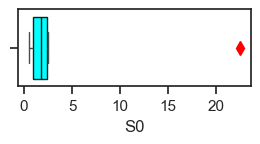

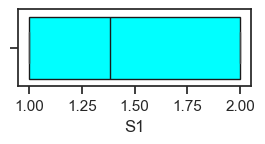

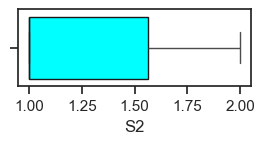

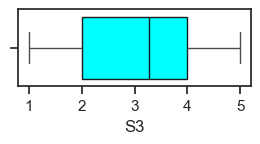

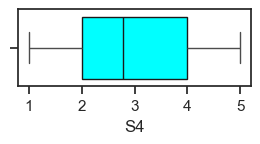

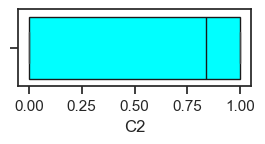

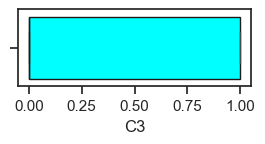

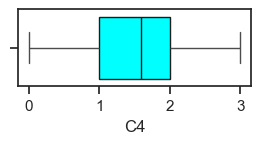

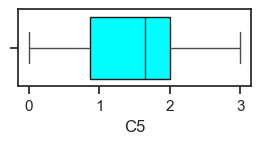

In [22]:
scalar_columns = []
for col in df.columns:
    if df[col].dtype!='object': scalar_columns.append( col )

boxprops    = dict( linewidth=1, edgecolor='k', facecolor='cyan' )
medianprops = dict( linewidth=1, color='k' )
flierprops  = dict( marker='d', markersize=7, markerfacecolor='red', markeredgecolor='red' )

for ft in scalar_columns:
    plt.figure(  figsize=(3,1)   )
    sns.boxplot( x=df[ ft ] 
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
    plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Winsorizing Extreme Outliers by Z-Score

In [23]:
# Winsorizing Extreme Outliers
df_dirty = df.copy()    
columns_with_outliers = [ 'S0' ]

def winsorize_by_zscore(df,ft):
    x  = df[ft].copy()
    M  = x.mean()
    SD = x.std()
    z  = (x-M) / SD
    
    upper_bound = +3
    lower_bound = -3
    
    ls = df.index[ (z > upper_bound) 
                 | (z < lower_bound) ]
    
    x_Des=sorted(x,reverse=True)
    i=0
    while x_Des[i] >=  M + 3*SD:
        i=i+1 
    MAX=x_Des[i] 
    
    x_Asc=sorted(x,reverse=False)
    i=0 
    while x_Asc[i] <=  M - 3*SD:
        i=i+1  
    MIN=x_Asc[i] 
    
    for i in range(0,len(x)):
        if   z[i] > upper_bound: x[i]=MAX
        elif z[i] < lower_bound: x[i]=MIN
            
    return [x, ls]

def winsorize_by_iqr(df,ft):
    x   = df[ft].copy()
     
    Q1  = x.quantile(0.25)
    Q3  = x.quantile(0.75)
    IQR = Q3-Q1 
    
    upper_bound = Q3+2*IQR
    lower_bound = Q1-2*IQR
    
    ls = df.index[ (x > upper_bound) 
                 | (x < lower_bound) ]
    
    x_Des=sorted(x,reverse=True)
    i=0
    while x_Des[i] >=  upper_bound:
        i=i+1 
    MAX=x_Des[i] 
    
    x_Asc=sorted(x,reverse=False)
    i=0 
    while x_Asc[i] <=  lower_bound:
        i=i+1  
    MIN=x_Asc[i] 
    
    for i in range(0,len(x)):
        if   x[i] > upper_bound: x[i]=MAX
        elif x[i] < lower_bound: x[i]=MIN 
            
    return [x, ls]
 

# df_no_extreme
DF = df_dirty.copy()

index_list = []
for c in columns_with_outliers:
    c_clean, ls = winsorize_by_iqr( df_dirty, c ) 
    index_list.extend( ls )
    DF.loc[ :, c ] = c_clean
for c in columns_with_outliers:
    c_clean, ls = winsorize_by_zscore( DF, c )
    index_list.extend( ls )
    DF.loc[ :, c ] = c_clean

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Checking

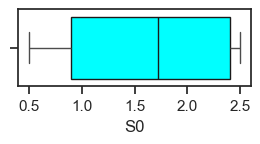

In [24]:
# Detecting Outliers by Boxplots 
for ft in columns_with_outliers:
    plt.figure(  figsize=(3,1)   )
    sns.boxplot( x=DF[ ft ] 
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
    plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Assigning

In [25]:
df = DF.copy()

pickle.dump( df,  open('df_Clean','wb') )  # save
df = pickle.load( open('df_Clean','rb') )  # load
df

,S0,S1,S2,S3,S4,C2,C3,C4,C5,S5,S6,C0,C1
0,1.726046,1.000000,2.000000,3.000000,3.000000,1.000000,0.197101,0.000000,0.000000,NaN,C2,Lime,Jazz
1,1.100000,1.383166,1.000000,5.000000,4.000000,0.000000,0.000000,1.587384,1.000000,C3,NaN,Cyan,Rock
2,2.400000,1.659599,1.000000,4.000000,1.000000,1.000000,0.000000,1.375911,2.000000,C2,NaN,Blue,Pop
3,2.500000,1.000000,1.563014,1.000000,5.000000,0.000000,1.000000,2.000000,0.866582,C3,C1,None,Jazz
4,2.500000,2.000000,1.351366,5.000000,1.000000,0.000000,1.000000,1.000000,1.643934,C3,C2,None,Rock
5,0.500000,1.000000,1.000000,3.268055,4.000000,1.000000,0.000000,2.000000,3.000000,C3,C3,Red,None
6,0.700000,2.000000,1.000000,3.605841,2.000000,1.000000,1.000000,2.000000,3.000000,C1,C3,Red,None
7,0.900000,2.000000,2.000000,2.000000,2.684655,0.839482,0.000000,1.000000,2.000000,C2,C1,Blue,Pop
8,1.800000,1.000000,1.000000,2.000000,2.778658,0.807054,0.000000,3.000000,0.000000,C1,C2,Pink,Jazz


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Treating Noise (Outliers) by AODs
 - Isolation Forest

In [26]:
from sklearn.ensemble        import IsolationForest

In [27]:
df_dirty = df.copy()    

X   = df_dirty[ scalar_columns ].values.copy()
AOD = IsolationForest( contamination=0.05 ).fit( X )
flag_clean = AOD.predict( X ) == +1
df_clean   = df_dirty.loc[ flag_clean, : ]
df_clean.index = range(df_clean.shape[0])

DF = df_clean.copy()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Observing Noise (Outliers) Before Vs After Treating by AODs

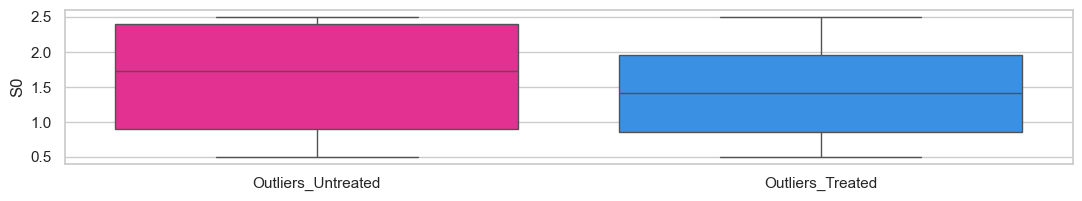

In [28]:
df_before = df.copy()
df_before['condition']=['Outliers_Untreated']*df_before.shape[0]
df_after  = DF.copy()
df_after['condition'] =['Outliers_Treated']*df_after.shape[0]
df_before_after = pd.concat([df_before,df_after],axis=0)
df_before_after.head()

x   = 'condition'
for y in columns_with_outliers:
    Xy = df_before_after[ [x,y] ].copy().dropna().sort_values([x],ascending=[False]) 
    # BoxPlot
    sns.set(rc={'figure.figsize':(13,2)}); sns.set(style='whitegrid')
    sns_plot = sns.boxplot( x=x, y=y, data=Xy, linewidth=1.0, palette=['deeppink','dodgerblue'], hue=x, legend=False)
    sns_plot.set_xlabel('')
    fig = sns_plot.get_figure(); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Assigning

In [29]:
df = DF.copy()  

pickle.dump( df,  open('df_Clean','wb') )  # save
df = pickle.load( open('df_Clean','rb') )  # load
df

,S0,S1,S2,S3,S4,C2,C3,C4,C5,S5,S6,C0,C1
0,1.726046,1.000000,2.000000,3.000000,3.000000,1.000000,0.197101,0.000000,0.000000,NaN,C2,Lime,Jazz
1,1.100000,1.383166,1.000000,5.000000,4.000000,0.000000,0.000000,1.587384,1.000000,C3,NaN,Cyan,Rock
2,2.400000,1.659599,1.000000,4.000000,1.000000,1.000000,0.000000,1.375911,2.000000,C2,NaN,Blue,Pop
3,2.500000,2.000000,1.351366,5.000000,1.000000,0.000000,1.000000,1.000000,1.643934,C3,C2,None,Rock
4,0.500000,1.000000,1.000000,3.268055,4.000000,1.000000,0.000000,2.000000,3.000000,C3,C3,Red,None
5,0.700000,2.000000,1.000000,3.605841,2.000000,1.000000,1.000000,2.000000,3.000000,C1,C3,Red,None
6,0.900000,2.000000,2.000000,2.000000,2.684655,0.839482,0.000000,1.000000,2.000000,C2,C1,Blue,Pop
7,1.800000,1.000000,1.000000,2.000000,2.778658,0.807054,0.000000,3.000000,0.000000,C1,C2,Pink,Jazz


#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Feature Selection - Variation of Distributions ( Variance or Standard Deviation )
 - Good Variance > 0.1
 - Good STD > 0.3

In [76]:
SDs = df.std().sort_values(ascending=False)
SDs 

C5    1.178309
S4    1.170160
S3    1.168822
C4    0.888246
S0    0.764724
S1    0.468873
C3    0.452839
S2    0.452350
C2    0.442500
dtype: float64

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> High SDs, Low SDs

In [78]:
Threshhold = 0.3

High_SD_features = list( SDs[ SDs>=Threshhold ] .index )
Low_SD_features  = list( SDs[ SDs< Threshhold ] .index )

print( '\n High-SD features: \n', High_SD_features )
print( '\n Low-SD  features: \n', Low_SD_features  )


 High-SD features: 
 ['C5', 'S4', 'S3', 'C4', 'S0', 'S1', 'C3', 'S2', 'C2']

 Low-SD  features: 
 []


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
 - The feature **Pedi** has very low variation in distribution. Thus it has little use and should be removed.
 - The feature **Class** also has low variation which suggests count of one of the classes prevails the rest, but, as it is the **tatget columns**, it will be kept.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Sorting Features Based on Variation

In [79]:
df = df[ list( SDs.index ) ]

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Dropping Low-Variation Features

In [83]:
df.drop(Low_SD_features,axis=1,inplace=True)
df.columns.to_list()

['C5', 'S4', 'S3', 'C4', 'S0', 'S1', 'C3', 'S2', 'C2']

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Feature Selection - Heat-Map of Correlations
 - As the data is cleaned, **Pearson's r** correlation method can be used.

In [59]:
estimated_column = 'C2'

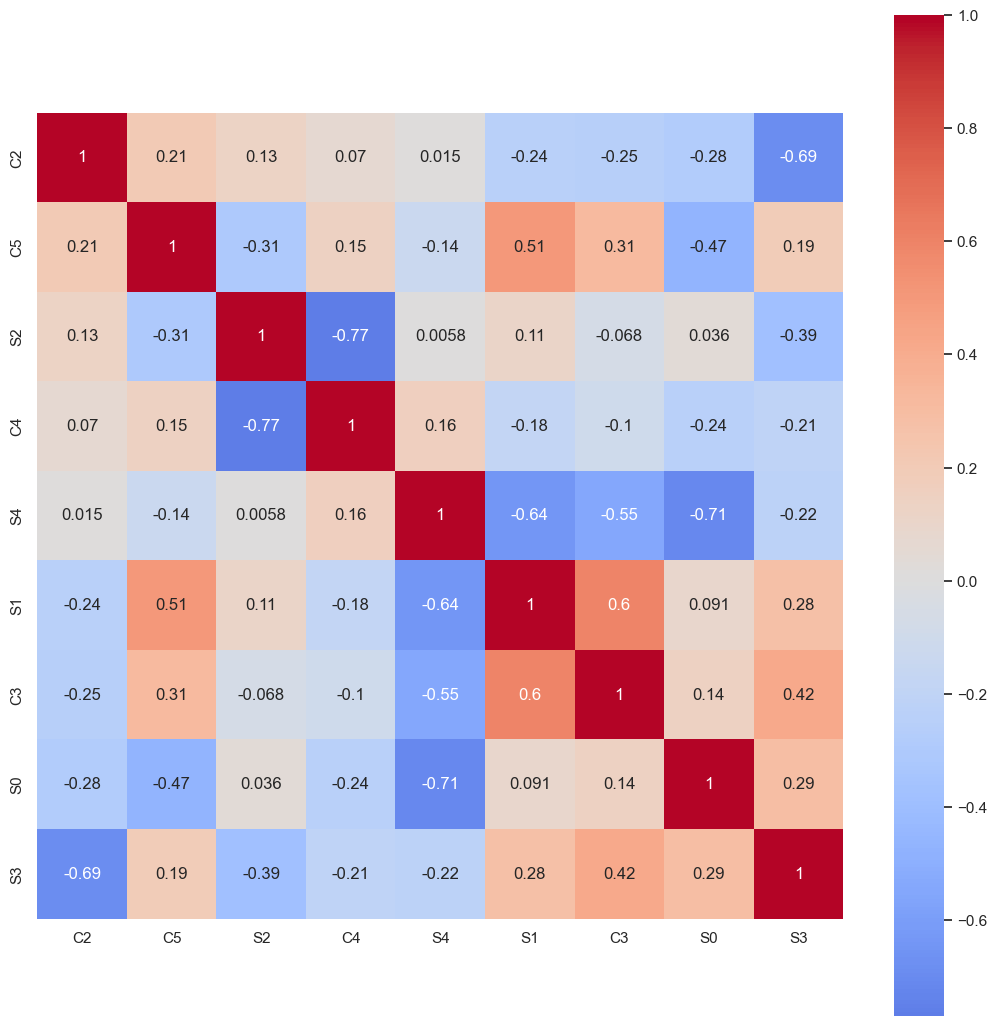

In [60]:
Corr = df.loc[:, df.dtypes != 'object'].copy().corr('pearson')
Corr.sort_values([estimated_column],ascending=[False],inplace=True)
Corr = Corr.T
Corr.sort_values([estimated_column],ascending=[False],inplace=True)

fig,ax = plt.subplots(figsize=(13,13))
sns_plot = sns.heatmap( Corr, mask=np.zeros_like(Corr,dtype=bool), 
                        cmap='coolwarm',
                        square=True, ax=ax, annot=True, center=0.00 )
plt.show()

In [61]:
Threshhold = 0.05

strongly_correlated_features = list( Corr[ abs(Corr[estimated_column]) >   0.70     ].index )
weakly_correlated_features   = list( Corr[ abs(Corr[estimated_column]) < Threshhold ].index )

print( '\n strongly-correlated features: \n', strongly_correlated_features )
print( '\n weakly-correlated features: \n'  , weakly_correlated_features   )


 strongly-correlated features: 
 ['C2']

 weakly-correlated features: 
 ['S4']


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
    
 - Correlation of any feature to **Target Column: Class** is less than 70%
 - **linear models** **( LinearSVC, LogisticRegression, PassiveAggressive, Perceptron, Ridge, SGD, SGDOneClassSVM )**, 
   will have weak performane.
 - **Nonlinear Models** like **Decision Tree** Should be used.
** **
 - None of features are less than 1% correlated to **Target Column: Class** and can be kept.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Sorting Features Based on Correlation

In [62]:
df = df[ list(Corr.columns) ]
df

,C2,C5,S2,C4,S4,S1,C3,S0,S3
0,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,0.197101,1.726046,3.000000
1,0.000000,1.000000,1.000000,1.587384,4.000000,1.383166,0.000000,1.100000,5.000000
2,1.000000,2.000000,1.000000,1.375911,1.000000,1.659599,0.000000,2.400000,4.000000
3,0.000000,1.643934,1.351366,1.000000,1.000000,2.000000,1.000000,2.500000,5.000000
4,1.000000,3.000000,1.000000,2.000000,4.000000,1.000000,0.000000,0.500000,3.268055
5,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.700000,3.605841
6,0.839482,2.000000,2.000000,1.000000,2.684655,2.000000,0.000000,0.900000,2.000000
7,0.807054,0.000000,1.000000,3.000000,2.778658,1.000000,0.000000,1.800000,2.000000


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Dropping Weakly-Correlated Features

In [63]:
#df.drop( weakly_correlated, axis=1, inplace=True )
#df.columns.to_list()

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Feature Selection - Chi-Squared Test

In [64]:
from sklearn.feature_selection import chi2

In [65]:
''' 
DF = df.loc[ :, DF.dtypes != 'object' ].copy()

X = DF.drop( [estimated_column], axis=1 )  
y = DF[estimated_column]
X_pvals = chi2(X,y)

# feature p values
# p value <= 0.05  means  strong feature
ft_pvals = pd.Series( X_pvals[1] )
ft_pvals.index = X.columns

# important & unimportant features
important_features   = list( ft_pvals[ft_pvals<=0.05].sort_values( ascending=True ).index )
unimportant_features = list( ft_pvals[ft_pvals> 0.05].sort_values( ascending=True ).index )

print( '\nChi-Squares P-Value Results:\n' )
print( (pd.DataFrame(ft_pvals,columns=['P_Value'])).sort_values(['P_Value']) )
print( '\n  Important_features:',   important_features )
print( '\nUnImportant_features:', unimportant_features )
''' 
pass

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report 
 - All Features Pass the Chi-Squared Test and are Important

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Dropping Unimportant Features

In [66]:
#df.drop( unimportant_features, axis=1, inplace=True )
#df.columns.to_list()

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> (Classification Only) --- Pair-Plot

In [67]:
estimated_column = 'C2'

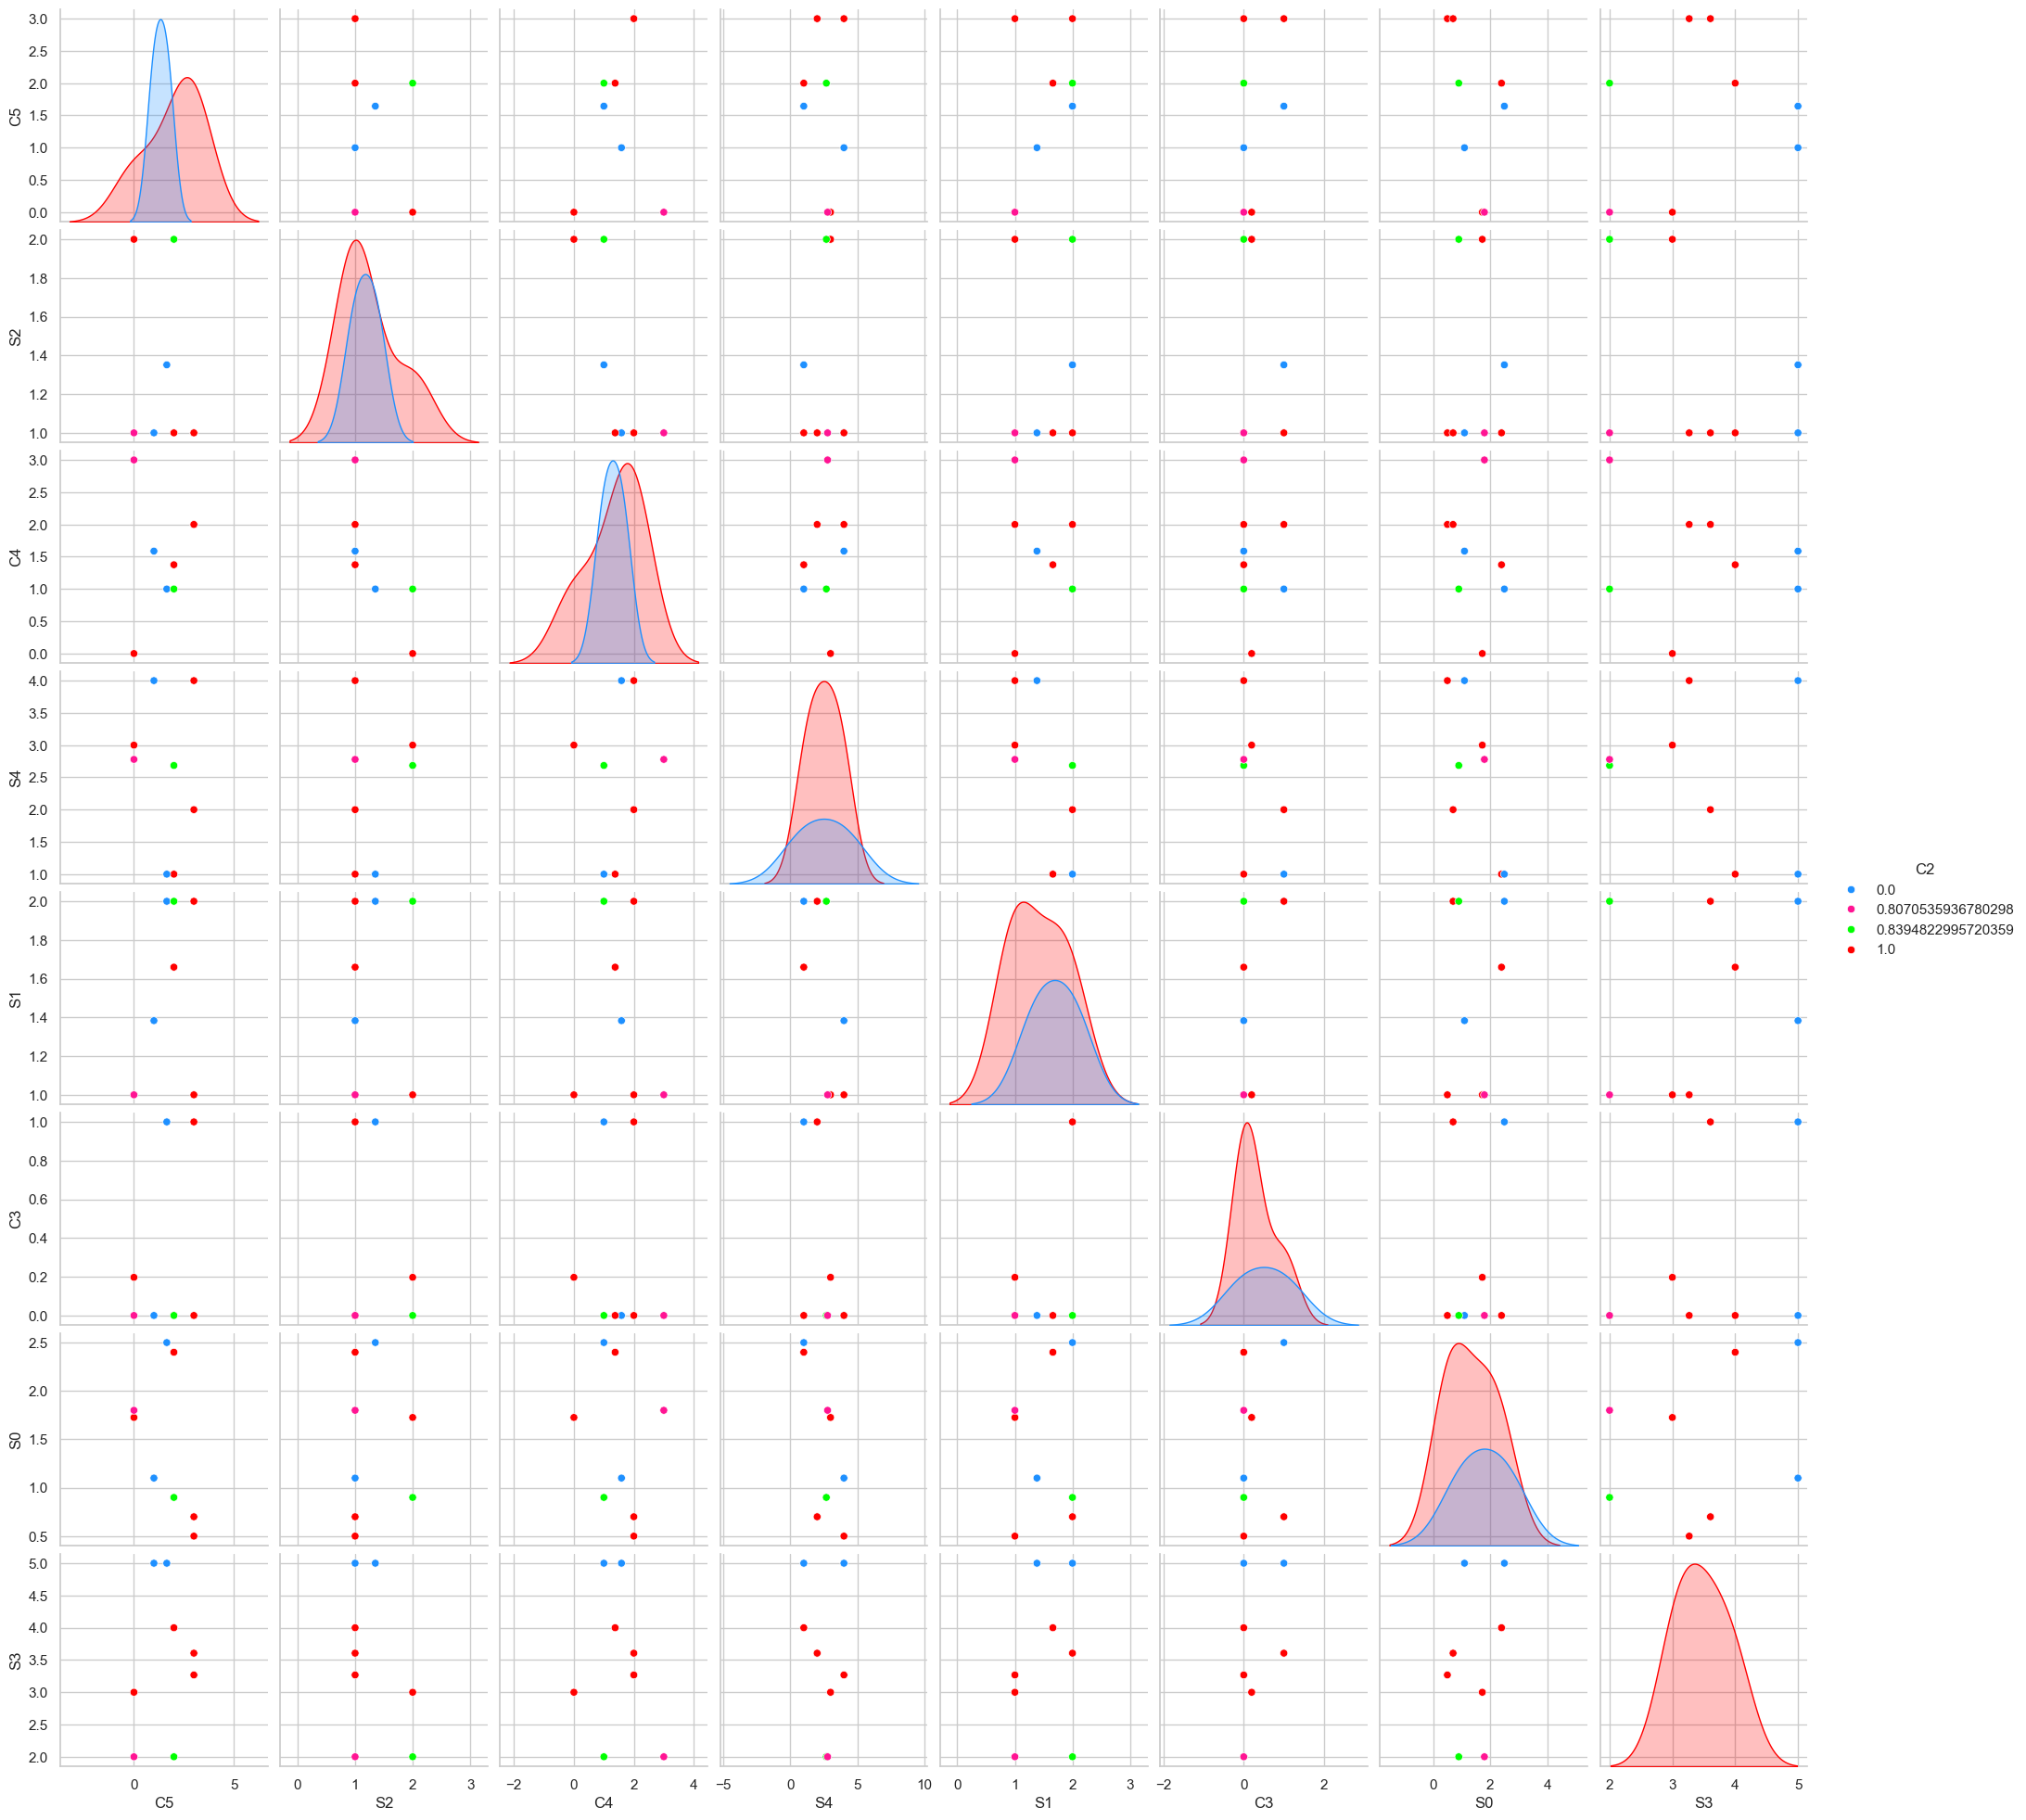

In [68]:
sns.pairplot( df, hue=estimated_column, diag_kind='kde', palette=['dodgerblue','deeppink','lime','red'] )
plt.show()

#####   

#####   